In [243]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
import torch.nn as nn

import pandas as pd

from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [244]:
data = pd.read_csv('EthDataset.csv')
data['Previous Block Hash'] = data ['Previous Block Hash'].apply(int, base=16)
data['Proof'] = data ['Proof'].apply(int, base=16)

#data = data.drop('Target (0000)', axis=1)


In [245]:
data.head()

,Previous Block Hash,Proof
0,1146441089199153060029496995276330877187321278...,4746932577408162196
1,2566412050267010276260271432621664016110204312...,3374703753689577614
2,8529195098143832201007857337380536610916135773...,10079388590392374760
3,9692593889131966006159283081848168745989525708...,3579112240188546260
4,5853639850872662295563687245050799779052506231...,13133519388590604


In [246]:
data['Proof']=(data['Proof']-data['Proof'].mean())/data['Proof'].std()
data['Previous Block Hash']=(data['Previous Block Hash']-data['Previous Block Hash'].mean())/data['Previous Block Hash'].std()


In [247]:
data.head()

,Previous Block Hash,Proof
0,1.69725,-0.797755
1,-0.952501,-1.056966
2,0.823166,0.209538
3,1.16962,-1.018354
4,0.0264079,-1.691961


In [248]:
x_train, x_test, y_train, y_test = train_test_split(data.loc[:, ['Previous Block Hash']], data['Proof'], test_size = 0.2, random_state = 0)

In [249]:
x_train.shape


(800, 1)

In [266]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, 25)
        self.fc3 = nn.Linear(25, 15)
        self.fc4 = nn.Linear(15, 1)

        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):


        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))

        return x

In [267]:
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
x_train.head()

,Previous Block Hash
0,-0.124248
1,-1.39534
2,-1.58139
3,-0.1811
4,1.56515


In [268]:
train_batch = np.array_split(x_train, 32)
label_batch = np.array_split(y_train, 32)

In [269]:
x = np.array(x_train, dtype=np.float32)
x.shape
y = np.array(y_train, dtype=np.float32)
y.shape
xtest = np.array(x_test, dtype=np.float32)
xtest.shape
ytest = np.array(y_test, dtype=np.float32)
ytest.shape

(201,)

In [270]:
x = torch.Tensor(x)
y = torch.Tensor(y)
xtest = torch.Tensor(xtest)
ytest = torch.Tensor(ytest)

In [271]:
torch_dataset = Data.TensorDataset(xtest, ytest)

train_loader = torch.utils.data.DataLoader(dataset=torch_dataset, 
                                           batch_size=32, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=torch_dataset, 
                                          batch_size=32, 
                                          shuffle=False)

In [274]:
model = Regressor()
criterion = nn.L1Loss()
optimizer = optim.Adamax(model.parameters(), lr=0.000001)

epochs = 5000
cc=0
train_losses, test_losses = [], []
for e in range(epochs):
    model.train()
    train_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(images)
        loss = (criterion(output, labels))
        loss.backward()
        optimizer.step()
        cc=cc+1
        train_loss += loss.item()
        

    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            predictions = model(xtest)
            test_loss += (criterion(predictions, ytest))
        train_losses.append(train_loss/len(train_loader))
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss))

Epoch: 1/5000..  Training Loss: 0.961..  Test Loss: 0.958.. 
Epoch: 2/5000..  Training Loss: 0.988..  Test Loss: 0.958.. 
Epoch: 3/5000..  Training Loss: 0.908..  Test Loss: 0.958.. 
Epoch: 4/5000..  Training Loss: 0.975..  Test Loss: 0.958.. 
Epoch: 5/5000..  Training Loss: 0.949..  Test Loss: 0.958.. 
Epoch: 6/5000..  Training Loss: 0.956..  Test Loss: 0.958.. 
Epoch: 7/5000..  Training Loss: 0.969..  Test Loss: 0.958.. 
Epoch: 8/5000..  Training Loss: 0.938..  Test Loss: 0.958.. 
Epoch: 9/5000..  Training Loss: 0.944..  Test Loss: 0.958.. 
Epoch: 10/5000..  Training Loss: 1.020..  Test Loss: 0.958.. 
Epoch: 11/5000..  Training Loss: 0.948..  Test Loss: 0.958.. 
Epoch: 12/5000..  Training Loss: 0.974..  Test Loss: 0.958.. 
Epoch: 13/5000..  Training Loss: 0.939..  Test Loss: 0.958.. 
Epoch: 14/5000..  Training Loss: 0.992..  Test Loss: 0.958.. 
Epoch: 15/5000..  Training Loss: 0.966..  Test Loss: 0.958.. 
Epoch: 16/5000..  Training Loss: 0.973..  Test Loss: 0.958.. 
Epoch: 17/5000.. 

Epoch: 147/5000..  Training Loss: 0.931..  Test Loss: 0.956.. 
Epoch: 148/5000..  Training Loss: 0.948..  Test Loss: 0.956.. 
Epoch: 149/5000..  Training Loss: 0.962..  Test Loss: 0.956.. 
Epoch: 150/5000..  Training Loss: 0.990..  Test Loss: 0.956.. 
Epoch: 151/5000..  Training Loss: 0.952..  Test Loss: 0.956.. 
Epoch: 152/5000..  Training Loss: 0.957..  Test Loss: 0.956.. 
Epoch: 153/5000..  Training Loss: 0.912..  Test Loss: 0.956.. 
Epoch: 154/5000..  Training Loss: 0.965..  Test Loss: 0.956.. 
Epoch: 155/5000..  Training Loss: 0.952..  Test Loss: 0.956.. 
Epoch: 156/5000..  Training Loss: 0.952..  Test Loss: 0.956.. 
Epoch: 157/5000..  Training Loss: 0.928..  Test Loss: 0.956.. 
Epoch: 158/5000..  Training Loss: 0.959..  Test Loss: 0.956.. 
Epoch: 159/5000..  Training Loss: 0.935..  Test Loss: 0.956.. 
Epoch: 160/5000..  Training Loss: 0.950..  Test Loss: 0.956.. 
Epoch: 161/5000..  Training Loss: 0.973..  Test Loss: 0.956.. 
Epoch: 162/5000..  Training Loss: 0.969..  Test Loss: 0

Epoch: 288/5000..  Training Loss: 0.947..  Test Loss: 0.955.. 
Epoch: 289/5000..  Training Loss: 0.960..  Test Loss: 0.955.. 
Epoch: 290/5000..  Training Loss: 0.959..  Test Loss: 0.955.. 
Epoch: 291/5000..  Training Loss: 0.986..  Test Loss: 0.955.. 
Epoch: 292/5000..  Training Loss: 0.980..  Test Loss: 0.955.. 
Epoch: 293/5000..  Training Loss: 0.952..  Test Loss: 0.955.. 
Epoch: 294/5000..  Training Loss: 0.967..  Test Loss: 0.955.. 
Epoch: 295/5000..  Training Loss: 0.946..  Test Loss: 0.955.. 
Epoch: 296/5000..  Training Loss: 0.946..  Test Loss: 0.955.. 
Epoch: 297/5000..  Training Loss: 0.927..  Test Loss: 0.955.. 
Epoch: 298/5000..  Training Loss: 0.975..  Test Loss: 0.955.. 
Epoch: 299/5000..  Training Loss: 0.990..  Test Loss: 0.955.. 
Epoch: 300/5000..  Training Loss: 0.955..  Test Loss: 0.955.. 
Epoch: 301/5000..  Training Loss: 0.939..  Test Loss: 0.955.. 
Epoch: 302/5000..  Training Loss: 0.927..  Test Loss: 0.955.. 
Epoch: 303/5000..  Training Loss: 0.944..  Test Loss: 0

Epoch: 423/5000..  Training Loss: 0.905..  Test Loss: 0.953.. 
Epoch: 424/5000..  Training Loss: 0.967..  Test Loss: 0.953.. 
Epoch: 425/5000..  Training Loss: 0.928..  Test Loss: 0.953.. 
Epoch: 426/5000..  Training Loss: 0.972..  Test Loss: 0.953.. 
Epoch: 427/5000..  Training Loss: 0.950..  Test Loss: 0.953.. 
Epoch: 428/5000..  Training Loss: 0.945..  Test Loss: 0.953.. 
Epoch: 429/5000..  Training Loss: 0.958..  Test Loss: 0.953.. 
Epoch: 430/5000..  Training Loss: 0.942..  Test Loss: 0.953.. 
Epoch: 431/5000..  Training Loss: 0.904..  Test Loss: 0.953.. 
Epoch: 432/5000..  Training Loss: 0.951..  Test Loss: 0.953.. 
Epoch: 433/5000..  Training Loss: 0.952..  Test Loss: 0.953.. 
Epoch: 434/5000..  Training Loss: 0.947..  Test Loss: 0.953.. 
Epoch: 435/5000..  Training Loss: 0.959..  Test Loss: 0.953.. 
Epoch: 436/5000..  Training Loss: 0.946..  Test Loss: 0.953.. 
Epoch: 437/5000..  Training Loss: 0.933..  Test Loss: 0.953.. 
Epoch: 438/5000..  Training Loss: 0.958..  Test Loss: 0

Epoch: 558/5000..  Training Loss: 0.977..  Test Loss: 0.952.. 
Epoch: 559/5000..  Training Loss: 0.917..  Test Loss: 0.952.. 
Epoch: 560/5000..  Training Loss: 0.962..  Test Loss: 0.952.. 
Epoch: 561/5000..  Training Loss: 0.952..  Test Loss: 0.952.. 
Epoch: 562/5000..  Training Loss: 0.969..  Test Loss: 0.952.. 
Epoch: 563/5000..  Training Loss: 0.954..  Test Loss: 0.952.. 
Epoch: 564/5000..  Training Loss: 0.928..  Test Loss: 0.952.. 
Epoch: 565/5000..  Training Loss: 0.964..  Test Loss: 0.952.. 
Epoch: 566/5000..  Training Loss: 0.972..  Test Loss: 0.952.. 
Epoch: 567/5000..  Training Loss: 0.929..  Test Loss: 0.952.. 
Epoch: 568/5000..  Training Loss: 0.961..  Test Loss: 0.952.. 
Epoch: 569/5000..  Training Loss: 0.937..  Test Loss: 0.952.. 
Epoch: 570/5000..  Training Loss: 0.948..  Test Loss: 0.952.. 
Epoch: 571/5000..  Training Loss: 0.936..  Test Loss: 0.952.. 
Epoch: 572/5000..  Training Loss: 0.973..  Test Loss: 0.952.. 
Epoch: 573/5000..  Training Loss: 0.955..  Test Loss: 0

Epoch: 704/5000..  Training Loss: 0.936..  Test Loss: 0.951.. 
Epoch: 705/5000..  Training Loss: 0.923..  Test Loss: 0.951.. 
Epoch: 706/5000..  Training Loss: 0.905..  Test Loss: 0.951.. 
Epoch: 707/5000..  Training Loss: 0.956..  Test Loss: 0.951.. 
Epoch: 708/5000..  Training Loss: 0.967..  Test Loss: 0.951.. 
Epoch: 709/5000..  Training Loss: 0.942..  Test Loss: 0.951.. 
Epoch: 710/5000..  Training Loss: 0.935..  Test Loss: 0.951.. 
Epoch: 711/5000..  Training Loss: 0.935..  Test Loss: 0.951.. 
Epoch: 712/5000..  Training Loss: 0.936..  Test Loss: 0.951.. 
Epoch: 713/5000..  Training Loss: 0.933..  Test Loss: 0.951.. 
Epoch: 714/5000..  Training Loss: 0.945..  Test Loss: 0.951.. 
Epoch: 715/5000..  Training Loss: 0.928..  Test Loss: 0.951.. 
Epoch: 716/5000..  Training Loss: 0.939..  Test Loss: 0.951.. 
Epoch: 717/5000..  Training Loss: 0.944..  Test Loss: 0.951.. 
Epoch: 718/5000..  Training Loss: 0.955..  Test Loss: 0.951.. 
Epoch: 719/5000..  Training Loss: 0.942..  Test Loss: 0

Epoch: 838/5000..  Training Loss: 0.934..  Test Loss: 0.949.. 
Epoch: 839/5000..  Training Loss: 0.937..  Test Loss: 0.949.. 
Epoch: 840/5000..  Training Loss: 0.925..  Test Loss: 0.949.. 
Epoch: 841/5000..  Training Loss: 0.977..  Test Loss: 0.949.. 
Epoch: 842/5000..  Training Loss: 0.940..  Test Loss: 0.949.. 
Epoch: 843/5000..  Training Loss: 0.932..  Test Loss: 0.949.. 
Epoch: 844/5000..  Training Loss: 0.966..  Test Loss: 0.949.. 
Epoch: 845/5000..  Training Loss: 0.931..  Test Loss: 0.949.. 
Epoch: 846/5000..  Training Loss: 0.965..  Test Loss: 0.949.. 
Epoch: 847/5000..  Training Loss: 0.961..  Test Loss: 0.949.. 
Epoch: 848/5000..  Training Loss: 0.971..  Test Loss: 0.949.. 
Epoch: 849/5000..  Training Loss: 0.923..  Test Loss: 0.949.. 
Epoch: 850/5000..  Training Loss: 0.934..  Test Loss: 0.949.. 
Epoch: 851/5000..  Training Loss: 0.930..  Test Loss: 0.949.. 
Epoch: 852/5000..  Training Loss: 0.943..  Test Loss: 0.949.. 
Epoch: 853/5000..  Training Loss: 0.959..  Test Loss: 0

Epoch: 974/5000..  Training Loss: 0.931..  Test Loss: 0.948.. 
Epoch: 975/5000..  Training Loss: 0.934..  Test Loss: 0.948.. 
Epoch: 976/5000..  Training Loss: 0.971..  Test Loss: 0.948.. 
Epoch: 977/5000..  Training Loss: 0.966..  Test Loss: 0.948.. 
Epoch: 978/5000..  Training Loss: 0.959..  Test Loss: 0.948.. 
Epoch: 979/5000..  Training Loss: 0.936..  Test Loss: 0.948.. 
Epoch: 980/5000..  Training Loss: 0.981..  Test Loss: 0.948.. 
Epoch: 981/5000..  Training Loss: 0.948..  Test Loss: 0.948.. 
Epoch: 982/5000..  Training Loss: 0.922..  Test Loss: 0.948.. 
Epoch: 983/5000..  Training Loss: 0.967..  Test Loss: 0.948.. 
Epoch: 984/5000..  Training Loss: 0.946..  Test Loss: 0.948.. 
Epoch: 985/5000..  Training Loss: 0.961..  Test Loss: 0.948.. 
Epoch: 986/5000..  Training Loss: 0.964..  Test Loss: 0.948.. 
Epoch: 987/5000..  Training Loss: 0.959..  Test Loss: 0.948.. 
Epoch: 988/5000..  Training Loss: 0.969..  Test Loss: 0.948.. 
Epoch: 989/5000..  Training Loss: 0.972..  Test Loss: 0

Epoch: 1117/5000..  Training Loss: 0.929..  Test Loss: 0.947.. 
Epoch: 1118/5000..  Training Loss: 0.961..  Test Loss: 0.947.. 
Epoch: 1119/5000..  Training Loss: 0.914..  Test Loss: 0.947.. 
Epoch: 1120/5000..  Training Loss: 0.924..  Test Loss: 0.947.. 
Epoch: 1121/5000..  Training Loss: 0.932..  Test Loss: 0.947.. 
Epoch: 1122/5000..  Training Loss: 0.927..  Test Loss: 0.947.. 
Epoch: 1123/5000..  Training Loss: 0.921..  Test Loss: 0.947.. 
Epoch: 1124/5000..  Training Loss: 0.953..  Test Loss: 0.947.. 
Epoch: 1125/5000..  Training Loss: 0.971..  Test Loss: 0.947.. 
Epoch: 1126/5000..  Training Loss: 0.944..  Test Loss: 0.947.. 
Epoch: 1127/5000..  Training Loss: 0.970..  Test Loss: 0.947.. 
Epoch: 1128/5000..  Training Loss: 0.917..  Test Loss: 0.947.. 
Epoch: 1129/5000..  Training Loss: 0.925..  Test Loss: 0.947.. 
Epoch: 1130/5000..  Training Loss: 0.921..  Test Loss: 0.947.. 
Epoch: 1131/5000..  Training Loss: 0.934..  Test Loss: 0.947.. 
Epoch: 1132/5000..  Training Loss: 0.953

Epoch: 1251/5000..  Training Loss: 0.920..  Test Loss: 0.946.. 
Epoch: 1252/5000..  Training Loss: 0.939..  Test Loss: 0.945.. 
Epoch: 1253/5000..  Training Loss: 0.977..  Test Loss: 0.945.. 
Epoch: 1254/5000..  Training Loss: 0.895..  Test Loss: 0.945.. 
Epoch: 1255/5000..  Training Loss: 0.963..  Test Loss: 0.945.. 
Epoch: 1256/5000..  Training Loss: 0.960..  Test Loss: 0.945.. 
Epoch: 1257/5000..  Training Loss: 0.942..  Test Loss: 0.945.. 
Epoch: 1258/5000..  Training Loss: 0.959..  Test Loss: 0.945.. 
Epoch: 1259/5000..  Training Loss: 0.975..  Test Loss: 0.945.. 
Epoch: 1260/5000..  Training Loss: 0.936..  Test Loss: 0.945.. 
Epoch: 1261/5000..  Training Loss: 0.954..  Test Loss: 0.945.. 
Epoch: 1262/5000..  Training Loss: 0.965..  Test Loss: 0.945.. 
Epoch: 1263/5000..  Training Loss: 0.935..  Test Loss: 0.945.. 
Epoch: 1264/5000..  Training Loss: 0.943..  Test Loss: 0.945.. 
Epoch: 1265/5000..  Training Loss: 0.924..  Test Loss: 0.945.. 
Epoch: 1266/5000..  Training Loss: 0.936

Epoch: 1382/5000..  Training Loss: 0.908..  Test Loss: 0.944.. 
Epoch: 1383/5000..  Training Loss: 0.961..  Test Loss: 0.944.. 
Epoch: 1384/5000..  Training Loss: 0.944..  Test Loss: 0.944.. 
Epoch: 1385/5000..  Training Loss: 0.927..  Test Loss: 0.944.. 
Epoch: 1386/5000..  Training Loss: 0.948..  Test Loss: 0.944.. 
Epoch: 1387/5000..  Training Loss: 0.921..  Test Loss: 0.944.. 
Epoch: 1388/5000..  Training Loss: 0.930..  Test Loss: 0.944.. 
Epoch: 1389/5000..  Training Loss: 0.920..  Test Loss: 0.944.. 
Epoch: 1390/5000..  Training Loss: 0.907..  Test Loss: 0.944.. 
Epoch: 1391/5000..  Training Loss: 0.920..  Test Loss: 0.944.. 
Epoch: 1392/5000..  Training Loss: 0.935..  Test Loss: 0.944.. 
Epoch: 1393/5000..  Training Loss: 0.962..  Test Loss: 0.944.. 
Epoch: 1394/5000..  Training Loss: 0.936..  Test Loss: 0.944.. 
Epoch: 1395/5000..  Training Loss: 0.938..  Test Loss: 0.944.. 
Epoch: 1396/5000..  Training Loss: 0.928..  Test Loss: 0.944.. 
Epoch: 1397/5000..  Training Loss: 0.930

Epoch: 1521/5000..  Training Loss: 0.934..  Test Loss: 0.943.. 
Epoch: 1522/5000..  Training Loss: 0.959..  Test Loss: 0.943.. 
Epoch: 1523/5000..  Training Loss: 0.933..  Test Loss: 0.943.. 
Epoch: 1524/5000..  Training Loss: 0.949..  Test Loss: 0.943.. 
Epoch: 1525/5000..  Training Loss: 0.965..  Test Loss: 0.943.. 
Epoch: 1526/5000..  Training Loss: 0.968..  Test Loss: 0.943.. 
Epoch: 1527/5000..  Training Loss: 0.940..  Test Loss: 0.943.. 
Epoch: 1528/5000..  Training Loss: 0.935..  Test Loss: 0.943.. 
Epoch: 1529/5000..  Training Loss: 0.937..  Test Loss: 0.943.. 
Epoch: 1530/5000..  Training Loss: 0.924..  Test Loss: 0.943.. 
Epoch: 1531/5000..  Training Loss: 0.958..  Test Loss: 0.943.. 
Epoch: 1532/5000..  Training Loss: 0.912..  Test Loss: 0.943.. 
Epoch: 1533/5000..  Training Loss: 0.912..  Test Loss: 0.943.. 
Epoch: 1534/5000..  Training Loss: 0.929..  Test Loss: 0.943.. 
Epoch: 1535/5000..  Training Loss: 0.952..  Test Loss: 0.943.. 
Epoch: 1536/5000..  Training Loss: 0.939

Epoch: 1655/5000..  Training Loss: 0.943..  Test Loss: 0.942.. 
Epoch: 1656/5000..  Training Loss: 0.941..  Test Loss: 0.942.. 
Epoch: 1657/5000..  Training Loss: 0.921..  Test Loss: 0.942.. 
Epoch: 1658/5000..  Training Loss: 0.935..  Test Loss: 0.942.. 
Epoch: 1659/5000..  Training Loss: 0.917..  Test Loss: 0.942.. 
Epoch: 1660/5000..  Training Loss: 0.933..  Test Loss: 0.942.. 
Epoch: 1661/5000..  Training Loss: 0.954..  Test Loss: 0.942.. 
Epoch: 1662/5000..  Training Loss: 0.961..  Test Loss: 0.942.. 
Epoch: 1663/5000..  Training Loss: 0.976..  Test Loss: 0.942.. 
Epoch: 1664/5000..  Training Loss: 0.925..  Test Loss: 0.942.. 
Epoch: 1665/5000..  Training Loss: 0.973..  Test Loss: 0.942.. 
Epoch: 1666/5000..  Training Loss: 0.950..  Test Loss: 0.942.. 
Epoch: 1667/5000..  Training Loss: 0.918..  Test Loss: 0.942.. 
Epoch: 1668/5000..  Training Loss: 0.937..  Test Loss: 0.942.. 
Epoch: 1669/5000..  Training Loss: 0.950..  Test Loss: 0.942.. 
Epoch: 1670/5000..  Training Loss: 0.937

Epoch: 1794/5000..  Training Loss: 0.953..  Test Loss: 0.940.. 
Epoch: 1795/5000..  Training Loss: 0.954..  Test Loss: 0.940.. 
Epoch: 1796/5000..  Training Loss: 0.960..  Test Loss: 0.940.. 
Epoch: 1797/5000..  Training Loss: 0.948..  Test Loss: 0.940.. 
Epoch: 1798/5000..  Training Loss: 0.972..  Test Loss: 0.940.. 
Epoch: 1799/5000..  Training Loss: 0.940..  Test Loss: 0.940.. 
Epoch: 1800/5000..  Training Loss: 0.937..  Test Loss: 0.940.. 
Epoch: 1801/5000..  Training Loss: 0.938..  Test Loss: 0.940.. 
Epoch: 1802/5000..  Training Loss: 0.969..  Test Loss: 0.940.. 
Epoch: 1803/5000..  Training Loss: 0.943..  Test Loss: 0.940.. 
Epoch: 1804/5000..  Training Loss: 0.969..  Test Loss: 0.940.. 
Epoch: 1805/5000..  Training Loss: 0.933..  Test Loss: 0.940.. 
Epoch: 1806/5000..  Training Loss: 0.951..  Test Loss: 0.940.. 
Epoch: 1807/5000..  Training Loss: 0.980..  Test Loss: 0.940.. 
Epoch: 1808/5000..  Training Loss: 0.921..  Test Loss: 0.940.. 
Epoch: 1809/5000..  Training Loss: 0.937

Epoch: 1925/5000..  Training Loss: 0.940..  Test Loss: 0.939.. 
Epoch: 1926/5000..  Training Loss: 0.923..  Test Loss: 0.939.. 
Epoch: 1927/5000..  Training Loss: 0.936..  Test Loss: 0.939.. 
Epoch: 1928/5000..  Training Loss: 0.947..  Test Loss: 0.939.. 
Epoch: 1929/5000..  Training Loss: 0.956..  Test Loss: 0.939.. 
Epoch: 1930/5000..  Training Loss: 0.960..  Test Loss: 0.939.. 
Epoch: 1931/5000..  Training Loss: 0.928..  Test Loss: 0.939.. 
Epoch: 1932/5000..  Training Loss: 0.966..  Test Loss: 0.939.. 
Epoch: 1933/5000..  Training Loss: 0.958..  Test Loss: 0.939.. 
Epoch: 1934/5000..  Training Loss: 0.937..  Test Loss: 0.939.. 
Epoch: 1935/5000..  Training Loss: 0.913..  Test Loss: 0.939.. 
Epoch: 1936/5000..  Training Loss: 0.941..  Test Loss: 0.939.. 
Epoch: 1937/5000..  Training Loss: 0.934..  Test Loss: 0.939.. 
Epoch: 1938/5000..  Training Loss: 0.935..  Test Loss: 0.939.. 
Epoch: 1939/5000..  Training Loss: 0.969..  Test Loss: 0.939.. 
Epoch: 1940/5000..  Training Loss: 0.986

Epoch: 2062/5000..  Training Loss: 0.923..  Test Loss: 0.938.. 
Epoch: 2063/5000..  Training Loss: 0.959..  Test Loss: 0.938.. 
Epoch: 2064/5000..  Training Loss: 0.936..  Test Loss: 0.938.. 
Epoch: 2065/5000..  Training Loss: 0.933..  Test Loss: 0.938.. 
Epoch: 2066/5000..  Training Loss: 0.924..  Test Loss: 0.938.. 
Epoch: 2067/5000..  Training Loss: 0.925..  Test Loss: 0.938.. 
Epoch: 2068/5000..  Training Loss: 0.987..  Test Loss: 0.938.. 
Epoch: 2069/5000..  Training Loss: 0.944..  Test Loss: 0.938.. 
Epoch: 2070/5000..  Training Loss: 0.940..  Test Loss: 0.938.. 
Epoch: 2071/5000..  Training Loss: 0.949..  Test Loss: 0.938.. 
Epoch: 2072/5000..  Training Loss: 0.957..  Test Loss: 0.938.. 
Epoch: 2073/5000..  Training Loss: 0.915..  Test Loss: 0.938.. 
Epoch: 2074/5000..  Training Loss: 0.926..  Test Loss: 0.938.. 
Epoch: 2075/5000..  Training Loss: 0.916..  Test Loss: 0.938.. 
Epoch: 2076/5000..  Training Loss: 0.947..  Test Loss: 0.938.. 
Epoch: 2077/5000..  Training Loss: 0.969

Epoch: 2194/5000..  Training Loss: 0.936..  Test Loss: 0.937.. 
Epoch: 2195/5000..  Training Loss: 0.944..  Test Loss: 0.937.. 
Epoch: 2196/5000..  Training Loss: 0.936..  Test Loss: 0.937.. 
Epoch: 2197/5000..  Training Loss: 0.927..  Test Loss: 0.937.. 
Epoch: 2198/5000..  Training Loss: 0.923..  Test Loss: 0.937.. 
Epoch: 2199/5000..  Training Loss: 0.947..  Test Loss: 0.937.. 
Epoch: 2200/5000..  Training Loss: 0.945..  Test Loss: 0.937.. 
Epoch: 2201/5000..  Training Loss: 0.934..  Test Loss: 0.937.. 
Epoch: 2202/5000..  Training Loss: 0.929..  Test Loss: 0.937.. 
Epoch: 2203/5000..  Training Loss: 0.958..  Test Loss: 0.937.. 
Epoch: 2204/5000..  Training Loss: 0.925..  Test Loss: 0.937.. 
Epoch: 2205/5000..  Training Loss: 0.918..  Test Loss: 0.937.. 
Epoch: 2206/5000..  Training Loss: 0.928..  Test Loss: 0.937.. 
Epoch: 2207/5000..  Training Loss: 0.959..  Test Loss: 0.937.. 
Epoch: 2208/5000..  Training Loss: 0.930..  Test Loss: 0.937.. 
Epoch: 2209/5000..  Training Loss: 0.904

Epoch: 2330/5000..  Training Loss: 0.918..  Test Loss: 0.936.. 
Epoch: 2331/5000..  Training Loss: 0.947..  Test Loss: 0.936.. 
Epoch: 2332/5000..  Training Loss: 0.956..  Test Loss: 0.936.. 
Epoch: 2333/5000..  Training Loss: 0.915..  Test Loss: 0.936.. 
Epoch: 2334/5000..  Training Loss: 0.939..  Test Loss: 0.936.. 
Epoch: 2335/5000..  Training Loss: 0.932..  Test Loss: 0.936.. 
Epoch: 2336/5000..  Training Loss: 0.915..  Test Loss: 0.936.. 
Epoch: 2337/5000..  Training Loss: 0.930..  Test Loss: 0.936.. 
Epoch: 2338/5000..  Training Loss: 0.917..  Test Loss: 0.936.. 
Epoch: 2339/5000..  Training Loss: 0.919..  Test Loss: 0.936.. 
Epoch: 2340/5000..  Training Loss: 0.950..  Test Loss: 0.936.. 
Epoch: 2341/5000..  Training Loss: 0.937..  Test Loss: 0.936.. 
Epoch: 2342/5000..  Training Loss: 0.928..  Test Loss: 0.936.. 
Epoch: 2343/5000..  Training Loss: 0.970..  Test Loss: 0.936.. 
Epoch: 2344/5000..  Training Loss: 0.935..  Test Loss: 0.936.. 
Epoch: 2345/5000..  Training Loss: 0.941

Epoch: 2463/5000..  Training Loss: 0.907..  Test Loss: 0.935.. 
Epoch: 2464/5000..  Training Loss: 0.914..  Test Loss: 0.935.. 
Epoch: 2465/5000..  Training Loss: 0.973..  Test Loss: 0.935.. 
Epoch: 2466/5000..  Training Loss: 0.937..  Test Loss: 0.935.. 
Epoch: 2467/5000..  Training Loss: 0.963..  Test Loss: 0.935.. 
Epoch: 2468/5000..  Training Loss: 0.913..  Test Loss: 0.935.. 
Epoch: 2469/5000..  Training Loss: 0.940..  Test Loss: 0.935.. 
Epoch: 2470/5000..  Training Loss: 0.913..  Test Loss: 0.935.. 
Epoch: 2471/5000..  Training Loss: 0.937..  Test Loss: 0.935.. 
Epoch: 2472/5000..  Training Loss: 0.942..  Test Loss: 0.935.. 
Epoch: 2473/5000..  Training Loss: 0.934..  Test Loss: 0.935.. 
Epoch: 2474/5000..  Training Loss: 0.961..  Test Loss: 0.935.. 
Epoch: 2475/5000..  Training Loss: 0.976..  Test Loss: 0.935.. 
Epoch: 2476/5000..  Training Loss: 0.937..  Test Loss: 0.935.. 
Epoch: 2477/5000..  Training Loss: 0.937..  Test Loss: 0.935.. 
Epoch: 2478/5000..  Training Loss: 0.941

Epoch: 2598/5000..  Training Loss: 0.933..  Test Loss: 0.934.. 
Epoch: 2599/5000..  Training Loss: 0.911..  Test Loss: 0.934.. 
Epoch: 2600/5000..  Training Loss: 0.933..  Test Loss: 0.934.. 
Epoch: 2601/5000..  Training Loss: 0.928..  Test Loss: 0.934.. 
Epoch: 2602/5000..  Training Loss: 0.926..  Test Loss: 0.934.. 
Epoch: 2603/5000..  Training Loss: 0.922..  Test Loss: 0.934.. 
Epoch: 2604/5000..  Training Loss: 0.939..  Test Loss: 0.934.. 
Epoch: 2605/5000..  Training Loss: 0.940..  Test Loss: 0.934.. 
Epoch: 2606/5000..  Training Loss: 0.931..  Test Loss: 0.934.. 
Epoch: 2607/5000..  Training Loss: 0.918..  Test Loss: 0.934.. 
Epoch: 2608/5000..  Training Loss: 0.960..  Test Loss: 0.934.. 
Epoch: 2609/5000..  Training Loss: 0.931..  Test Loss: 0.934.. 
Epoch: 2610/5000..  Training Loss: 0.921..  Test Loss: 0.934.. 
Epoch: 2611/5000..  Training Loss: 0.957..  Test Loss: 0.934.. 
Epoch: 2612/5000..  Training Loss: 0.913..  Test Loss: 0.934.. 
Epoch: 2613/5000..  Training Loss: 0.921

Epoch: 2730/5000..  Training Loss: 0.929..  Test Loss: 0.933.. 
Epoch: 2731/5000..  Training Loss: 0.932..  Test Loss: 0.933.. 
Epoch: 2732/5000..  Training Loss: 0.916..  Test Loss: 0.933.. 
Epoch: 2733/5000..  Training Loss: 0.928..  Test Loss: 0.933.. 
Epoch: 2734/5000..  Training Loss: 0.942..  Test Loss: 0.933.. 
Epoch: 2735/5000..  Training Loss: 0.949..  Test Loss: 0.933.. 
Epoch: 2736/5000..  Training Loss: 0.925..  Test Loss: 0.933.. 
Epoch: 2737/5000..  Training Loss: 0.939..  Test Loss: 0.933.. 
Epoch: 2738/5000..  Training Loss: 0.940..  Test Loss: 0.933.. 
Epoch: 2739/5000..  Training Loss: 0.927..  Test Loss: 0.933.. 
Epoch: 2740/5000..  Training Loss: 0.951..  Test Loss: 0.933.. 
Epoch: 2741/5000..  Training Loss: 0.932..  Test Loss: 0.933.. 
Epoch: 2742/5000..  Training Loss: 0.898..  Test Loss: 0.933.. 
Epoch: 2743/5000..  Training Loss: 0.939..  Test Loss: 0.933.. 
Epoch: 2744/5000..  Training Loss: 0.942..  Test Loss: 0.933.. 
Epoch: 2745/5000..  Training Loss: 0.944

Epoch: 2866/5000..  Training Loss: 0.973..  Test Loss: 0.932.. 
Epoch: 2867/5000..  Training Loss: 0.919..  Test Loss: 0.932.. 
Epoch: 2868/5000..  Training Loss: 0.931..  Test Loss: 0.932.. 
Epoch: 2869/5000..  Training Loss: 0.922..  Test Loss: 0.932.. 
Epoch: 2870/5000..  Training Loss: 0.911..  Test Loss: 0.932.. 
Epoch: 2871/5000..  Training Loss: 0.971..  Test Loss: 0.932.. 
Epoch: 2872/5000..  Training Loss: 0.930..  Test Loss: 0.932.. 
Epoch: 2873/5000..  Training Loss: 0.931..  Test Loss: 0.932.. 
Epoch: 2874/5000..  Training Loss: 0.879..  Test Loss: 0.932.. 
Epoch: 2875/5000..  Training Loss: 0.943..  Test Loss: 0.932.. 
Epoch: 2876/5000..  Training Loss: 0.925..  Test Loss: 0.932.. 
Epoch: 2877/5000..  Training Loss: 0.947..  Test Loss: 0.932.. 
Epoch: 2878/5000..  Training Loss: 0.914..  Test Loss: 0.932.. 
Epoch: 2879/5000..  Training Loss: 0.957..  Test Loss: 0.932.. 
Epoch: 2880/5000..  Training Loss: 0.919..  Test Loss: 0.932.. 
Epoch: 2881/5000..  Training Loss: 0.893

Epoch: 2995/5000..  Training Loss: 0.946..  Test Loss: 0.931.. 
Epoch: 2996/5000..  Training Loss: 0.928..  Test Loss: 0.931.. 
Epoch: 2997/5000..  Training Loss: 0.948..  Test Loss: 0.931.. 
Epoch: 2998/5000..  Training Loss: 0.912..  Test Loss: 0.931.. 
Epoch: 2999/5000..  Training Loss: 0.905..  Test Loss: 0.931.. 
Epoch: 3000/5000..  Training Loss: 0.925..  Test Loss: 0.931.. 
Epoch: 3001/5000..  Training Loss: 0.955..  Test Loss: 0.931.. 
Epoch: 3002/5000..  Training Loss: 0.918..  Test Loss: 0.931.. 
Epoch: 3003/5000..  Training Loss: 0.905..  Test Loss: 0.931.. 
Epoch: 3004/5000..  Training Loss: 0.922..  Test Loss: 0.931.. 
Epoch: 3005/5000..  Training Loss: 0.874..  Test Loss: 0.931.. 
Epoch: 3006/5000..  Training Loss: 0.889..  Test Loss: 0.931.. 
Epoch: 3007/5000..  Training Loss: 0.941..  Test Loss: 0.931.. 
Epoch: 3008/5000..  Training Loss: 0.909..  Test Loss: 0.931.. 
Epoch: 3009/5000..  Training Loss: 0.912..  Test Loss: 0.931.. 
Epoch: 3010/5000..  Training Loss: 0.926

Epoch: 3128/5000..  Training Loss: 0.927..  Test Loss: 0.930.. 
Epoch: 3129/5000..  Training Loss: 0.908..  Test Loss: 0.930.. 
Epoch: 3130/5000..  Training Loss: 0.893..  Test Loss: 0.930.. 
Epoch: 3131/5000..  Training Loss: 0.950..  Test Loss: 0.930.. 
Epoch: 3132/5000..  Training Loss: 0.924..  Test Loss: 0.930.. 
Epoch: 3133/5000..  Training Loss: 0.910..  Test Loss: 0.930.. 
Epoch: 3134/5000..  Training Loss: 0.919..  Test Loss: 0.930.. 
Epoch: 3135/5000..  Training Loss: 0.949..  Test Loss: 0.930.. 
Epoch: 3136/5000..  Training Loss: 0.921..  Test Loss: 0.930.. 
Epoch: 3137/5000..  Training Loss: 0.897..  Test Loss: 0.930.. 
Epoch: 3138/5000..  Training Loss: 0.924..  Test Loss: 0.930.. 
Epoch: 3139/5000..  Training Loss: 0.953..  Test Loss: 0.930.. 
Epoch: 3140/5000..  Training Loss: 0.895..  Test Loss: 0.930.. 
Epoch: 3141/5000..  Training Loss: 0.923..  Test Loss: 0.930.. 
Epoch: 3142/5000..  Training Loss: 0.913..  Test Loss: 0.930.. 
Epoch: 3143/5000..  Training Loss: 0.949

Epoch: 3263/5000..  Training Loss: 0.910..  Test Loss: 0.929.. 
Epoch: 3264/5000..  Training Loss: 0.946..  Test Loss: 0.929.. 
Epoch: 3265/5000..  Training Loss: 0.942..  Test Loss: 0.929.. 
Epoch: 3266/5000..  Training Loss: 0.953..  Test Loss: 0.929.. 
Epoch: 3267/5000..  Training Loss: 0.909..  Test Loss: 0.929.. 
Epoch: 3268/5000..  Training Loss: 0.918..  Test Loss: 0.929.. 
Epoch: 3269/5000..  Training Loss: 0.939..  Test Loss: 0.929.. 
Epoch: 3270/5000..  Training Loss: 0.946..  Test Loss: 0.929.. 
Epoch: 3271/5000..  Training Loss: 0.900..  Test Loss: 0.929.. 
Epoch: 3272/5000..  Training Loss: 0.941..  Test Loss: 0.929.. 
Epoch: 3273/5000..  Training Loss: 0.951..  Test Loss: 0.929.. 
Epoch: 3274/5000..  Training Loss: 0.922..  Test Loss: 0.929.. 
Epoch: 3275/5000..  Training Loss: 0.924..  Test Loss: 0.929.. 
Epoch: 3276/5000..  Training Loss: 0.944..  Test Loss: 0.929.. 
Epoch: 3277/5000..  Training Loss: 0.937..  Test Loss: 0.929.. 
Epoch: 3278/5000..  Training Loss: 0.947

Epoch: 3400/5000..  Training Loss: 0.968..  Test Loss: 0.928.. 
Epoch: 3401/5000..  Training Loss: 0.915..  Test Loss: 0.928.. 
Epoch: 3402/5000..  Training Loss: 0.945..  Test Loss: 0.928.. 
Epoch: 3403/5000..  Training Loss: 0.909..  Test Loss: 0.928.. 
Epoch: 3404/5000..  Training Loss: 0.928..  Test Loss: 0.928.. 
Epoch: 3405/5000..  Training Loss: 0.956..  Test Loss: 0.928.. 
Epoch: 3406/5000..  Training Loss: 0.943..  Test Loss: 0.928.. 
Epoch: 3407/5000..  Training Loss: 0.919..  Test Loss: 0.928.. 
Epoch: 3408/5000..  Training Loss: 0.918..  Test Loss: 0.928.. 
Epoch: 3409/5000..  Training Loss: 0.896..  Test Loss: 0.928.. 
Epoch: 3410/5000..  Training Loss: 0.932..  Test Loss: 0.928.. 
Epoch: 3411/5000..  Training Loss: 0.946..  Test Loss: 0.928.. 
Epoch: 3412/5000..  Training Loss: 0.916..  Test Loss: 0.928.. 
Epoch: 3413/5000..  Training Loss: 0.928..  Test Loss: 0.928.. 
Epoch: 3414/5000..  Training Loss: 0.925..  Test Loss: 0.928.. 
Epoch: 3415/5000..  Training Loss: 0.903

Epoch: 3536/5000..  Training Loss: 0.907..  Test Loss: 0.927.. 
Epoch: 3537/5000..  Training Loss: 0.923..  Test Loss: 0.927.. 
Epoch: 3538/5000..  Training Loss: 0.907..  Test Loss: 0.927.. 
Epoch: 3539/5000..  Training Loss: 0.914..  Test Loss: 0.927.. 
Epoch: 3540/5000..  Training Loss: 0.939..  Test Loss: 0.927.. 
Epoch: 3541/5000..  Training Loss: 0.927..  Test Loss: 0.927.. 
Epoch: 3542/5000..  Training Loss: 0.933..  Test Loss: 0.927.. 
Epoch: 3543/5000..  Training Loss: 0.916..  Test Loss: 0.927.. 
Epoch: 3544/5000..  Training Loss: 0.943..  Test Loss: 0.927.. 
Epoch: 3545/5000..  Training Loss: 0.943..  Test Loss: 0.927.. 
Epoch: 3546/5000..  Training Loss: 0.922..  Test Loss: 0.927.. 
Epoch: 3547/5000..  Training Loss: 0.939..  Test Loss: 0.927.. 
Epoch: 3548/5000..  Training Loss: 0.933..  Test Loss: 0.927.. 
Epoch: 3549/5000..  Training Loss: 0.916..  Test Loss: 0.927.. 
Epoch: 3550/5000..  Training Loss: 0.930..  Test Loss: 0.927.. 
Epoch: 3551/5000..  Training Loss: 0.955

Epoch: 3668/5000..  Training Loss: 0.907..  Test Loss: 0.926.. 
Epoch: 3669/5000..  Training Loss: 0.924..  Test Loss: 0.926.. 
Epoch: 3670/5000..  Training Loss: 0.937..  Test Loss: 0.926.. 
Epoch: 3671/5000..  Training Loss: 0.927..  Test Loss: 0.926.. 
Epoch: 3672/5000..  Training Loss: 0.931..  Test Loss: 0.926.. 
Epoch: 3673/5000..  Training Loss: 0.944..  Test Loss: 0.926.. 
Epoch: 3674/5000..  Training Loss: 0.909..  Test Loss: 0.926.. 
Epoch: 3675/5000..  Training Loss: 0.903..  Test Loss: 0.926.. 
Epoch: 3676/5000..  Training Loss: 0.933..  Test Loss: 0.926.. 
Epoch: 3677/5000..  Training Loss: 0.968..  Test Loss: 0.926.. 
Epoch: 3678/5000..  Training Loss: 0.931..  Test Loss: 0.926.. 
Epoch: 3679/5000..  Training Loss: 0.936..  Test Loss: 0.926.. 
Epoch: 3680/5000..  Training Loss: 0.934..  Test Loss: 0.926.. 
Epoch: 3681/5000..  Training Loss: 0.941..  Test Loss: 0.926.. 
Epoch: 3682/5000..  Training Loss: 0.921..  Test Loss: 0.926.. 
Epoch: 3683/5000..  Training Loss: 0.911

Epoch: 3798/5000..  Training Loss: 0.884..  Test Loss: 0.925.. 
Epoch: 3799/5000..  Training Loss: 0.894..  Test Loss: 0.925.. 
Epoch: 3800/5000..  Training Loss: 0.918..  Test Loss: 0.925.. 
Epoch: 3801/5000..  Training Loss: 0.895..  Test Loss: 0.925.. 
Epoch: 3802/5000..  Training Loss: 0.950..  Test Loss: 0.925.. 
Epoch: 3803/5000..  Training Loss: 0.908..  Test Loss: 0.925.. 
Epoch: 3804/5000..  Training Loss: 0.940..  Test Loss: 0.925.. 
Epoch: 3805/5000..  Training Loss: 0.912..  Test Loss: 0.925.. 
Epoch: 3806/5000..  Training Loss: 0.934..  Test Loss: 0.925.. 
Epoch: 3807/5000..  Training Loss: 0.927..  Test Loss: 0.925.. 
Epoch: 3808/5000..  Training Loss: 0.910..  Test Loss: 0.925.. 
Epoch: 3809/5000..  Training Loss: 0.937..  Test Loss: 0.925.. 
Epoch: 3810/5000..  Training Loss: 0.955..  Test Loss: 0.925.. 
Epoch: 3811/5000..  Training Loss: 0.951..  Test Loss: 0.925.. 
Epoch: 3812/5000..  Training Loss: 0.917..  Test Loss: 0.925.. 
Epoch: 3813/5000..  Training Loss: 0.933

Epoch: 3929/5000..  Training Loss: 0.897..  Test Loss: 0.925.. 
Epoch: 3930/5000..  Training Loss: 0.924..  Test Loss: 0.925.. 
Epoch: 3931/5000..  Training Loss: 0.930..  Test Loss: 0.925.. 
Epoch: 3932/5000..  Training Loss: 0.914..  Test Loss: 0.925.. 
Epoch: 3933/5000..  Training Loss: 0.898..  Test Loss: 0.925.. 
Epoch: 3934/5000..  Training Loss: 0.925..  Test Loss: 0.925.. 
Epoch: 3935/5000..  Training Loss: 0.921..  Test Loss: 0.925.. 
Epoch: 3936/5000..  Training Loss: 0.921..  Test Loss: 0.925.. 
Epoch: 3937/5000..  Training Loss: 0.893..  Test Loss: 0.925.. 
Epoch: 3938/5000..  Training Loss: 0.912..  Test Loss: 0.925.. 
Epoch: 3939/5000..  Training Loss: 0.941..  Test Loss: 0.924.. 
Epoch: 3940/5000..  Training Loss: 0.933..  Test Loss: 0.924.. 
Epoch: 3941/5000..  Training Loss: 0.912..  Test Loss: 0.924.. 
Epoch: 3942/5000..  Training Loss: 0.915..  Test Loss: 0.924.. 
Epoch: 3943/5000..  Training Loss: 0.894..  Test Loss: 0.924.. 
Epoch: 3944/5000..  Training Loss: 0.926

Epoch: 4063/5000..  Training Loss: 0.967..  Test Loss: 0.924.. 
Epoch: 4064/5000..  Training Loss: 0.909..  Test Loss: 0.924.. 
Epoch: 4065/5000..  Training Loss: 0.938..  Test Loss: 0.924.. 
Epoch: 4066/5000..  Training Loss: 0.947..  Test Loss: 0.924.. 
Epoch: 4067/5000..  Training Loss: 0.915..  Test Loss: 0.924.. 
Epoch: 4068/5000..  Training Loss: 0.941..  Test Loss: 0.924.. 
Epoch: 4069/5000..  Training Loss: 0.935..  Test Loss: 0.924.. 
Epoch: 4070/5000..  Training Loss: 0.910..  Test Loss: 0.924.. 
Epoch: 4071/5000..  Training Loss: 0.918..  Test Loss: 0.924.. 
Epoch: 4072/5000..  Training Loss: 0.909..  Test Loss: 0.924.. 
Epoch: 4073/5000..  Training Loss: 0.931..  Test Loss: 0.924.. 
Epoch: 4074/5000..  Training Loss: 0.910..  Test Loss: 0.924.. 
Epoch: 4075/5000..  Training Loss: 0.917..  Test Loss: 0.924.. 
Epoch: 4076/5000..  Training Loss: 0.922..  Test Loss: 0.924.. 
Epoch: 4077/5000..  Training Loss: 0.924..  Test Loss: 0.924.. 
Epoch: 4078/5000..  Training Loss: 0.911

Epoch: 4196/5000..  Training Loss: 0.956..  Test Loss: 0.923.. 
Epoch: 4197/5000..  Training Loss: 0.894..  Test Loss: 0.923.. 
Epoch: 4198/5000..  Training Loss: 0.911..  Test Loss: 0.923.. 
Epoch: 4199/5000..  Training Loss: 0.953..  Test Loss: 0.923.. 
Epoch: 4200/5000..  Training Loss: 0.946..  Test Loss: 0.923.. 
Epoch: 4201/5000..  Training Loss: 0.949..  Test Loss: 0.923.. 
Epoch: 4202/5000..  Training Loss: 0.938..  Test Loss: 0.923.. 
Epoch: 4203/5000..  Training Loss: 0.940..  Test Loss: 0.923.. 
Epoch: 4204/5000..  Training Loss: 0.941..  Test Loss: 0.923.. 
Epoch: 4205/5000..  Training Loss: 0.938..  Test Loss: 0.923.. 
Epoch: 4206/5000..  Training Loss: 0.926..  Test Loss: 0.923.. 
Epoch: 4207/5000..  Training Loss: 0.908..  Test Loss: 0.923.. 
Epoch: 4208/5000..  Training Loss: 0.911..  Test Loss: 0.923.. 
Epoch: 4209/5000..  Training Loss: 0.907..  Test Loss: 0.923.. 
Epoch: 4210/5000..  Training Loss: 0.914..  Test Loss: 0.923.. 
Epoch: 4211/5000..  Training Loss: 0.916

Epoch: 4328/5000..  Training Loss: 0.908..  Test Loss: 0.922.. 
Epoch: 4329/5000..  Training Loss: 0.897..  Test Loss: 0.922.. 
Epoch: 4330/5000..  Training Loss: 0.935..  Test Loss: 0.922.. 
Epoch: 4331/5000..  Training Loss: 0.917..  Test Loss: 0.922.. 
Epoch: 4332/5000..  Training Loss: 0.935..  Test Loss: 0.922.. 
Epoch: 4333/5000..  Training Loss: 0.957..  Test Loss: 0.922.. 
Epoch: 4334/5000..  Training Loss: 0.884..  Test Loss: 0.922.. 
Epoch: 4335/5000..  Training Loss: 0.923..  Test Loss: 0.922.. 
Epoch: 4336/5000..  Training Loss: 0.919..  Test Loss: 0.922.. 
Epoch: 4337/5000..  Training Loss: 0.917..  Test Loss: 0.922.. 
Epoch: 4338/5000..  Training Loss: 0.898..  Test Loss: 0.922.. 
Epoch: 4339/5000..  Training Loss: 0.903..  Test Loss: 0.922.. 
Epoch: 4340/5000..  Training Loss: 0.908..  Test Loss: 0.922.. 
Epoch: 4341/5000..  Training Loss: 0.926..  Test Loss: 0.922.. 
Epoch: 4342/5000..  Training Loss: 0.958..  Test Loss: 0.922.. 
Epoch: 4343/5000..  Training Loss: 0.939

Epoch: 4465/5000..  Training Loss: 0.942..  Test Loss: 0.921.. 
Epoch: 4466/5000..  Training Loss: 0.900..  Test Loss: 0.921.. 
Epoch: 4467/5000..  Training Loss: 0.910..  Test Loss: 0.921.. 
Epoch: 4468/5000..  Training Loss: 0.949..  Test Loss: 0.921.. 
Epoch: 4469/5000..  Training Loss: 0.942..  Test Loss: 0.921.. 
Epoch: 4470/5000..  Training Loss: 0.929..  Test Loss: 0.921.. 
Epoch: 4471/5000..  Training Loss: 0.914..  Test Loss: 0.921.. 
Epoch: 4472/5000..  Training Loss: 0.912..  Test Loss: 0.921.. 
Epoch: 4473/5000..  Training Loss: 0.925..  Test Loss: 0.921.. 
Epoch: 4474/5000..  Training Loss: 0.942..  Test Loss: 0.921.. 
Epoch: 4475/5000..  Training Loss: 0.927..  Test Loss: 0.921.. 
Epoch: 4476/5000..  Training Loss: 0.904..  Test Loss: 0.921.. 
Epoch: 4477/5000..  Training Loss: 0.894..  Test Loss: 0.921.. 
Epoch: 4478/5000..  Training Loss: 0.901..  Test Loss: 0.921.. 
Epoch: 4479/5000..  Training Loss: 0.932..  Test Loss: 0.921.. 
Epoch: 4480/5000..  Training Loss: 0.927

Epoch: 4600/5000..  Training Loss: 0.905..  Test Loss: 0.920.. 
Epoch: 4601/5000..  Training Loss: 0.914..  Test Loss: 0.920.. 
Epoch: 4602/5000..  Training Loss: 0.912..  Test Loss: 0.920.. 
Epoch: 4603/5000..  Training Loss: 0.942..  Test Loss: 0.920.. 
Epoch: 4604/5000..  Training Loss: 0.925..  Test Loss: 0.920.. 
Epoch: 4605/5000..  Training Loss: 0.919..  Test Loss: 0.920.. 
Epoch: 4606/5000..  Training Loss: 0.890..  Test Loss: 0.920.. 
Epoch: 4607/5000..  Training Loss: 0.919..  Test Loss: 0.920.. 
Epoch: 4608/5000..  Training Loss: 0.911..  Test Loss: 0.920.. 
Epoch: 4609/5000..  Training Loss: 0.946..  Test Loss: 0.920.. 
Epoch: 4610/5000..  Training Loss: 0.942..  Test Loss: 0.920.. 
Epoch: 4611/5000..  Training Loss: 0.936..  Test Loss: 0.920.. 
Epoch: 4612/5000..  Training Loss: 0.899..  Test Loss: 0.920.. 
Epoch: 4613/5000..  Training Loss: 0.894..  Test Loss: 0.920.. 
Epoch: 4614/5000..  Training Loss: 0.927..  Test Loss: 0.920.. 
Epoch: 4615/5000..  Training Loss: 0.943

Epoch: 4732/5000..  Training Loss: 0.921..  Test Loss: 0.919.. 
Epoch: 4733/5000..  Training Loss: 0.898..  Test Loss: 0.919.. 
Epoch: 4734/5000..  Training Loss: 0.941..  Test Loss: 0.919.. 
Epoch: 4735/5000..  Training Loss: 0.894..  Test Loss: 0.919.. 
Epoch: 4736/5000..  Training Loss: 0.892..  Test Loss: 0.919.. 
Epoch: 4737/5000..  Training Loss: 0.925..  Test Loss: 0.919.. 
Epoch: 4738/5000..  Training Loss: 0.915..  Test Loss: 0.919.. 
Epoch: 4739/5000..  Training Loss: 0.900..  Test Loss: 0.919.. 
Epoch: 4740/5000..  Training Loss: 0.913..  Test Loss: 0.919.. 
Epoch: 4741/5000..  Training Loss: 0.931..  Test Loss: 0.919.. 
Epoch: 4742/5000..  Training Loss: 0.927..  Test Loss: 0.919.. 
Epoch: 4743/5000..  Training Loss: 0.937..  Test Loss: 0.919.. 
Epoch: 4744/5000..  Training Loss: 0.917..  Test Loss: 0.919.. 
Epoch: 4745/5000..  Training Loss: 0.898..  Test Loss: 0.919.. 
Epoch: 4746/5000..  Training Loss: 0.933..  Test Loss: 0.919.. 
Epoch: 4747/5000..  Training Loss: 0.909

Epoch: 4864/5000..  Training Loss: 0.897..  Test Loss: 0.919.. 
Epoch: 4865/5000..  Training Loss: 0.913..  Test Loss: 0.919.. 
Epoch: 4866/5000..  Training Loss: 0.915..  Test Loss: 0.919.. 
Epoch: 4867/5000..  Training Loss: 0.912..  Test Loss: 0.919.. 
Epoch: 4868/5000..  Training Loss: 0.900..  Test Loss: 0.919.. 
Epoch: 4869/5000..  Training Loss: 0.944..  Test Loss: 0.919.. 
Epoch: 4870/5000..  Training Loss: 0.924..  Test Loss: 0.919.. 
Epoch: 4871/5000..  Training Loss: 0.924..  Test Loss: 0.919.. 
Epoch: 4872/5000..  Training Loss: 0.941..  Test Loss: 0.919.. 
Epoch: 4873/5000..  Training Loss: 0.926..  Test Loss: 0.919.. 
Epoch: 4874/5000..  Training Loss: 0.907..  Test Loss: 0.919.. 
Epoch: 4875/5000..  Training Loss: 0.936..  Test Loss: 0.919.. 
Epoch: 4876/5000..  Training Loss: 0.897..  Test Loss: 0.919.. 
Epoch: 4877/5000..  Training Loss: 0.921..  Test Loss: 0.919.. 
Epoch: 4878/5000..  Training Loss: 0.907..  Test Loss: 0.919.. 
Epoch: 4879/5000..  Training Loss: 0.908

Epoch: 4995/5000..  Training Loss: 0.880..  Test Loss: 0.918.. 
Epoch: 4996/5000..  Training Loss: 0.938..  Test Loss: 0.918.. 
Epoch: 4997/5000..  Training Loss: 0.899..  Test Loss: 0.918.. 
Epoch: 4998/5000..  Training Loss: 0.903..  Test Loss: 0.918.. 
Epoch: 4999/5000..  Training Loss: 0.928..  Test Loss: 0.918.. 
Epoch: 5000/5000..  Training Loss: 0.933..  Test Loss: 0.918.. 


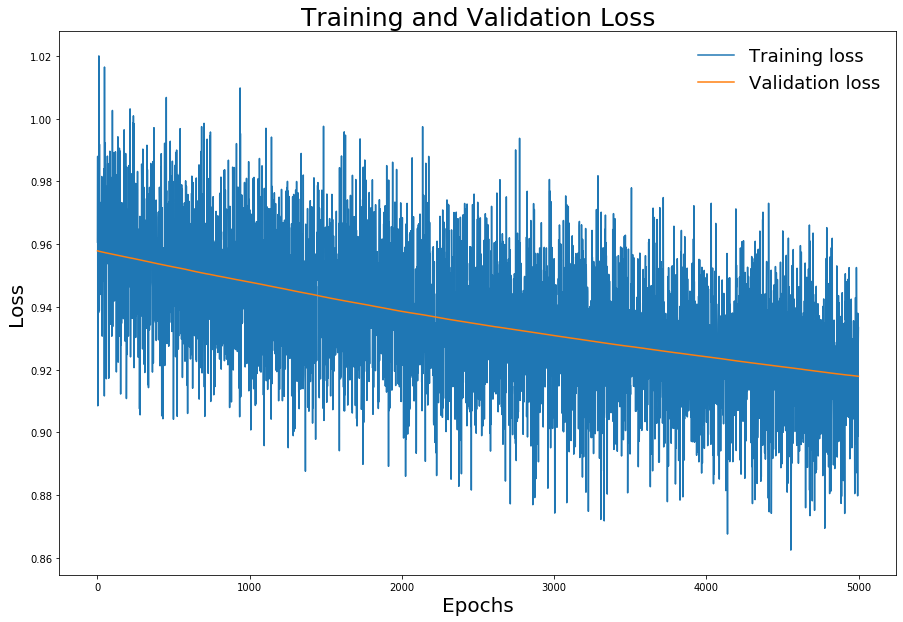

<Figure size 1080x720 with 0 Axes>

In [285]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
params = {'legend.fontsize': 18,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(loc=3, prop={'size': 30})

plt.legend(frameon=False)
plt.xlabel("Epochs",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.title("Training and Validation Loss",fontsize=25)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('image3.pdf', dpi=100,bbox_inches='tight')